In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Step 1: Input data
def create_data():
    """
    Create a DataFrame with X and Y values.
    
    Returns:
        pd.DataFrame: A DataFrame containing X and Y values.
    """
    data = {'X': [1, 2, 3],
            'Y': [2, 4, 6]}
    return pd.DataFrame(data)

# Step 2: Calculate covariance and correlation
def calculate_covariance_and_correlation(df):
    """
    Calculate the covariance and correlation between X and Y.
    
    Parameters:
        df (pd.DataFrame): DataFrame with 'X' and 'Y' columns.
        
    Returns:
        tuple: (covariance, correlation_coefficient, updated DataFrame)
    """
    mean_X = df['X'].mean()
    mean_Y = df['Y'].mean()

    # Compute deviations from the mean
    df['X_i - X̄'] = df['X'] - mean_X
    df['Y_i - Ȳ'] = df['Y'] - mean_Y

    # Compute product of deviations
    df['(X_i - X̄)(Y_i - Ȳ)'] = df['X_i - X̄'] * df['Y_i - Ȳ']

    # Calculate covariance
    n = len(df)
    covariance = df['(X_i - X̄)(Y_i - Ȳ)'].sum() / (n - 1)

    # Calculate variance of X and Y
    df['(X_i - X̄)^2'] = df['X_i - X̄'] ** 2
    df['(Y_i - Ȳ)^2'] = df['Y_i - Ȳ'] ** 2
    variance_X = df['(X_i - X̄)^2'].sum() / (n - 1)
    variance_Y = df['(Y_i - Ȳ)^2'].sum() / (n - 1)

    # Calculate correlation coefficient
    correlation_coefficient = covariance / (np.sqrt(variance_X * variance_Y))

    return covariance, correlation_coefficient, df

# Step 3: Plotting the data points and results
def plot_data(df, covariance, correlation_coefficient):
    """
    Plot the scatter plot of X and Y with covariance and correlation displayed.
    
    Parameters:
        df (pd.DataFrame): DataFrame containing X and Y values.
        covariance (float): Covariance between X and Y.
        correlation_coefficient (float): Correlation coefficient between X and Y.
    """
    mean_X = df['X'].mean()
    mean_Y = df['Y'].mean()

    plt.figure(figsize=(8, 6))
    plt.scatter(df['X'], df['Y'], color='blue', label='Data points')
    plt.plot(df['X'], df['Y'], color='red', label=f'Y = 2X')

    # Adding labels and title
    plt.title('Scatter Plot of X and Y with Covariance Calculation', fontsize=14)
    plt.xlabel('X')
    plt.ylabel('Y')

    # Plot mean lines
    plt.axhline(mean_Y, color='green', linestyle='--', label='Mean Y')
    plt.axvline(mean_X, color='green', linestyle='--', label='Mean X')

    # Display covariance and correlation on the plot
    plt.text(1, 5, f"Cov(X, Y) = {covariance:.2f}\nCorr(X, Y) = {correlation_coefficient:.2f}", 
             fontsize=12, bbox=dict(facecolor='white', alpha=0.5))

    # Display legend
    plt.legend()

    # Show the plot
    plt.tight_layout()
    plt.show()


In [3]:
# Step 1: Create data
df = create_data()

# Step 2: Calculate covariance and correlation
covariance, correlation_coefficient, df = calculate_covariance_and_correlation(df)

# Display dataframe for reference (optional)
print("Covariance Calculation")
print(df)

Covariance Calculation
   X  Y  X_i - X̄  Y_i - Ȳ  (X_i - X̄)(Y_i - Ȳ)  (X_i - X̄)^2  (Y_i - Ȳ)^2
0  1  2      -1.0      -2.0                   2.0           1.0           4.0
1  2  4       0.0       0.0                   0.0           0.0           0.0
2  3  6       1.0       2.0                   2.0           1.0           4.0


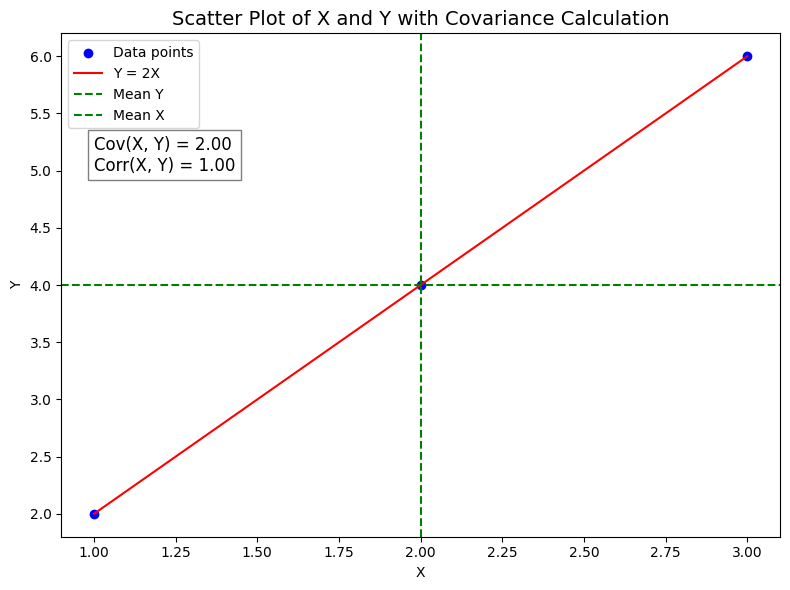

In [4]:
# Step 3: Plot the data and results
plot_data(df, covariance, correlation_coefficient)